In [2]:
FOLDER_PATH = '/kaggle/input/feature-engineering-data'

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


In [4]:
X_train = pd.read_pickle(f'{FOLDER_PATH}/X_train.pkl')
X_test = pd.read_pickle(f'{FOLDER_PATH}/X_test.pkl')
y_train = pd.read_pickle(f'{FOLDER_PATH}/y_train.pkl')
y_test = pd.read_pickle(f'{FOLDER_PATH}/y_test.pkl')

In [5]:
X_train

,Pclass,Sex,Age,SibSp,Fare,Embarked
331,1,0.0,45.5,0,28.5000,2
733,2,0.0,23.0,0,13.0000,2
382,3,0.0,32.0,0,7.9250,2
704,3,0.0,26.0,1,7.8542,2
813,3,1.0,6.0,4,31.2750,2
...,...,...,...,...,...,...
106,3,1.0,21.0,0,7.6500,2
270,1,0.0,28.0,0,31.0000,2
860,3,0.0,41.0,2,14.1083,2
435,1,1.0,14.0,1,120.0000,2


In [6]:
LogisticRegressionModel = LogisticRegression()

In [7]:
LogisticRegressionModel.fit(X_train,y_train)

LogisticRegression()

In [8]:
lr_y_pred = LogisticRegressionModel.predict(X_test)

In [9]:
lr_y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [10]:
lr_ACC = accuracy_score(y_test,lr_y_pred).round(2)
print(f"Logistic Regression Accracy = {lr_ACC*100}%")

Logistic Regression Accracy = 80.0%


In [11]:
lr_confusion_matrix = confusion_matrix(y_test, lr_y_pred)
print("Logistic Regression Confusion Matrix:\n", lr_confusion_matrix)


Logistic Regression Confusion Matrix:
 [[88 17]
 [19 55]]


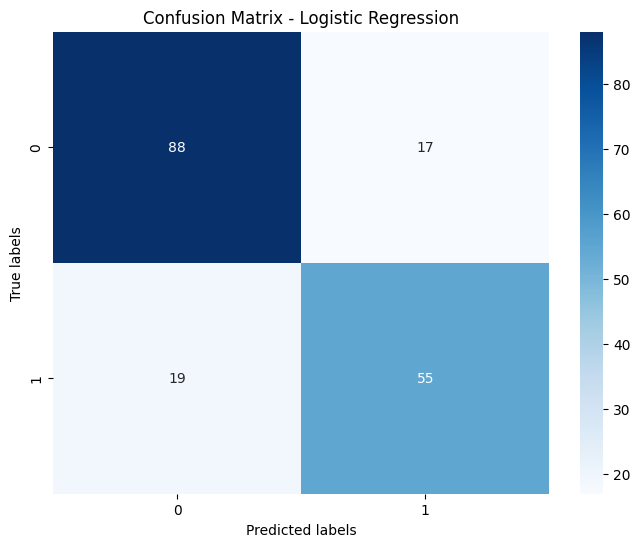

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

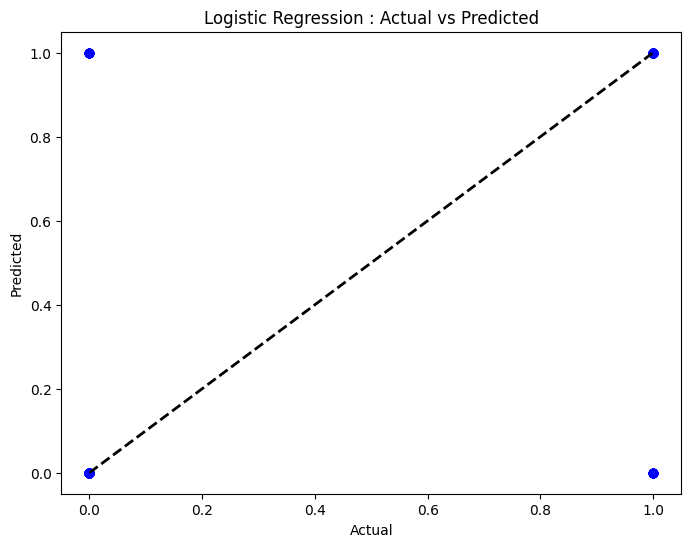

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Logistic Regression : Actual vs Predicted')
plt.show()

In [14]:
DecisionTreeModel = DecisionTreeClassifier()

In [15]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
dt_pred = DecisionTreeModel.predict(X_test)
dt_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1])

In [17]:
dt_acc = accuracy_score(y_test,dt_pred).round(2)
print(f"Decision Tree Accracy = {dt_acc*100}%")

Decision Tree Accracy = 78.0%


In [18]:
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)


Decision Tree Confusion Matrix:
 [[84 21]
 [19 55]]


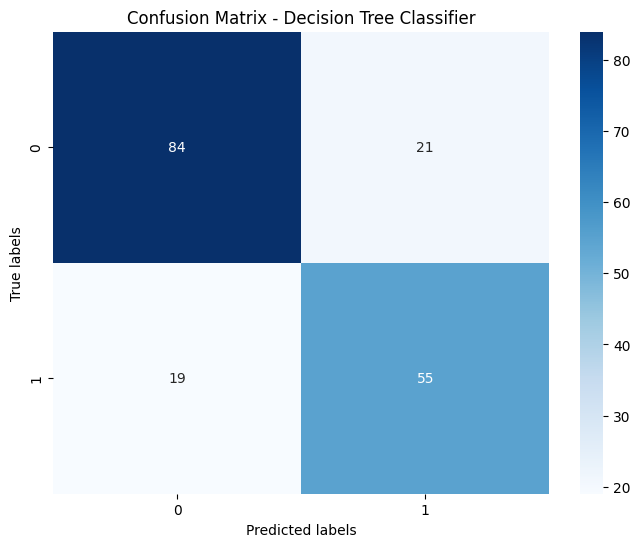

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

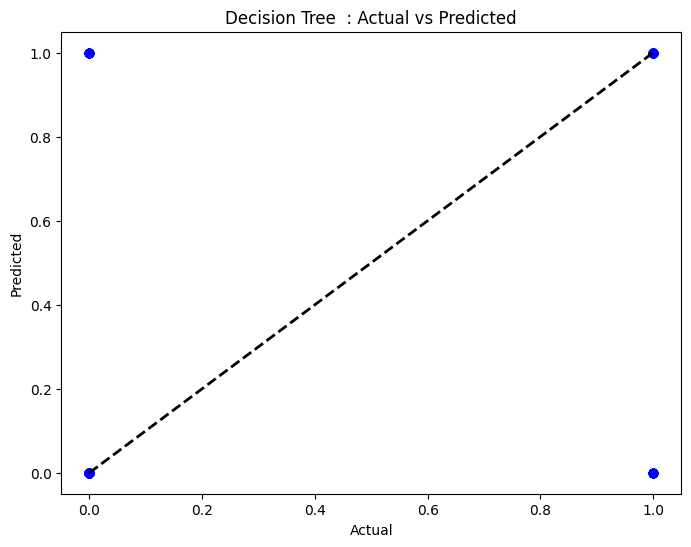

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree  : Actual vs Predicted')
plt.show()

In [21]:
rf_model = RandomForestClassifier()

In [22]:
rf_model.fit(X_train , y_train)

RandomForestClassifier()

In [23]:
rf_pred = rf_model.predict(X_test)
rf_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [24]:
rf_acc = accuracy_score(y_test,rf_pred).round(2)
print(f"Random Forest Accracy = {rf_acc*100}%")

Random Forest Accracy = 82.0%


In [25]:
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)


Random Forest Confusion Matrix:
 [[92 13]
 [19 55]]


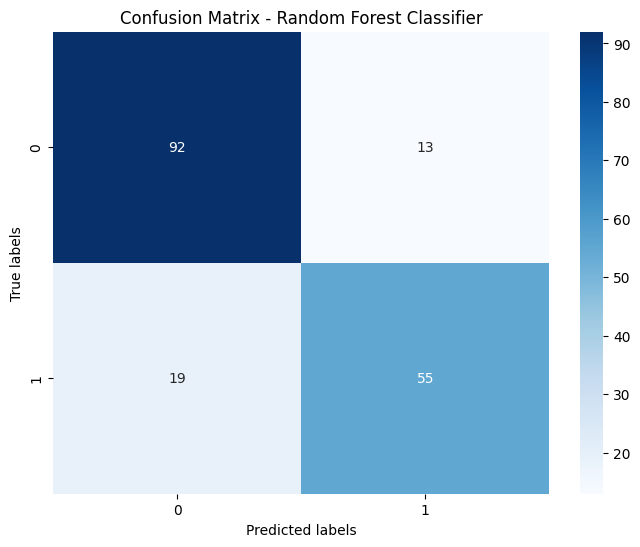

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [29]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [30]:
knn_acc = accuracy_score(y_test,rf_pred).round(2)
print(f"KNN Accracy = {knn_acc*100}%")

KNN Accracy = 82.0%


In [31]:
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print("KNN Confusion Matrix:\n", knn_confusion_matrix)


KNN Confusion Matrix:
 [[90 15]
 [35 39]]


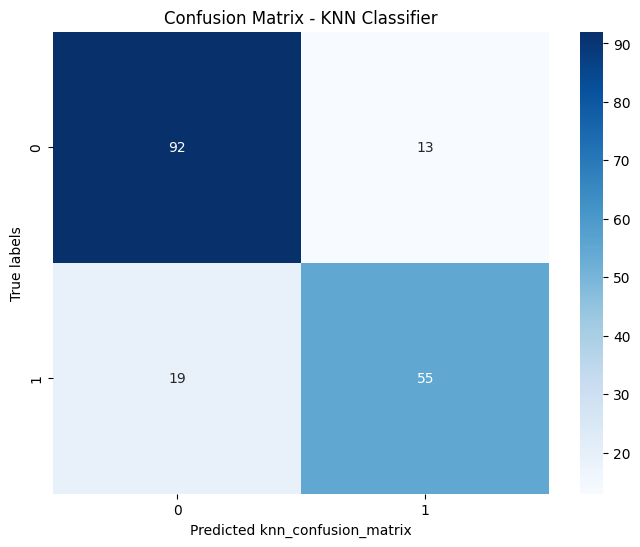

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted knn_confusion_matrix')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN Classifier')
plt.show()

In [33]:
xgb_model = xgb.XGBClassifier()


In [34]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
xgb_pred = xgb_model.predict(X_test)

In [36]:
xgb_acc = accuracy_score(y_test,rf_pred).round(2)
print(f"KNN Accracy = {xgb_acc*100}%")

KNN Accracy = 82.0%


In [37]:
xgb_confusion_matrix = confusion_matrix(y_test, xgb_pred)
print("XGBoost  Confusion Matrix:\n", xgb_confusion_matrix)


XGBoost  Confusion Matrix:
 [[84 21]
 [19 55]]


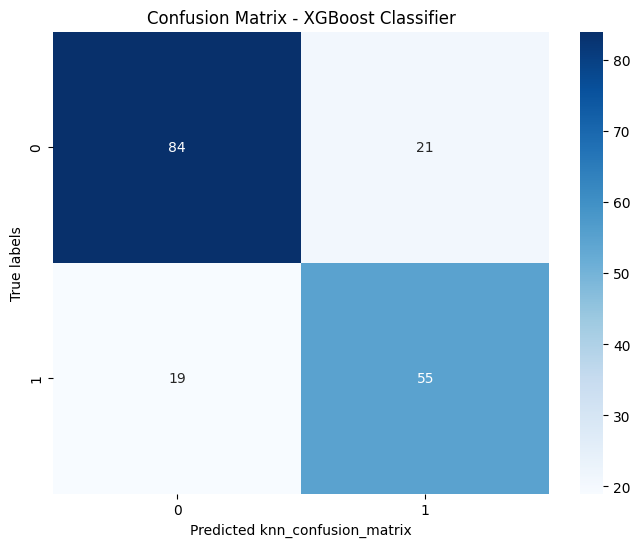

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted knn_confusion_matrix')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()

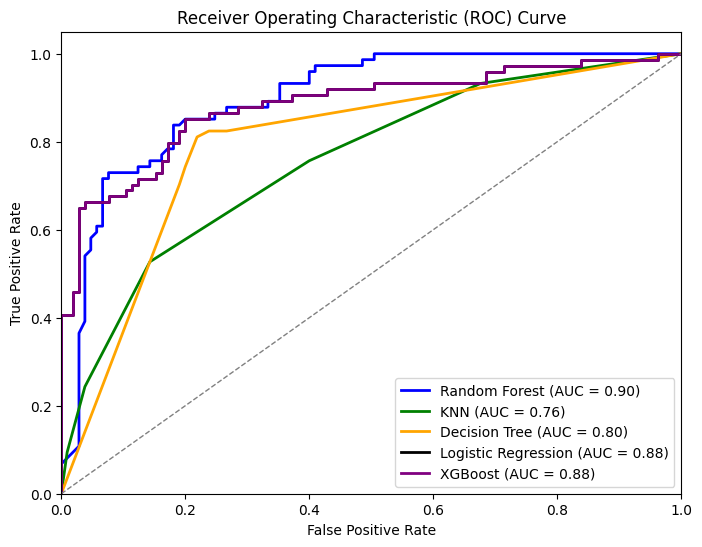

In [39]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
lr_probs = LogisticRegressionModel.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
dt_probs = DecisionTreeModel.predict_proba(X_test)
xgb_probs = xgb_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs[:, 1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs[:, 1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs[:, 1])
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[:, 1])
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, lr_probs[:, 1])

# Calculate AUC (Area Under the Curve)
rf_auc = auc(rf_fpr, rf_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
lr_auc = auc(lr_fpr, lr_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, color='orange', lw=2, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, color='black', lw=2, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='purple', lw=2, label=f'XGBoost (AUC = {xgb_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


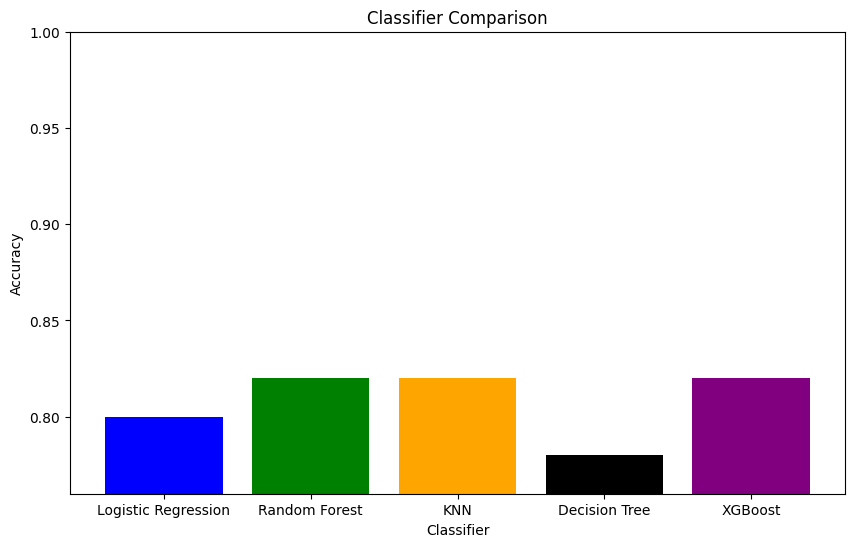

In [40]:
import matplotlib.pyplot as plt
import numpy as np

accuracies = [lr_ACC, rf_acc, knn_acc, dt_acc, xgb_acc]
classifiers = ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree', 'XGBoost']

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange', 'black', 'purple'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')
plt.ylim(0.76, 1)  
plt.show()


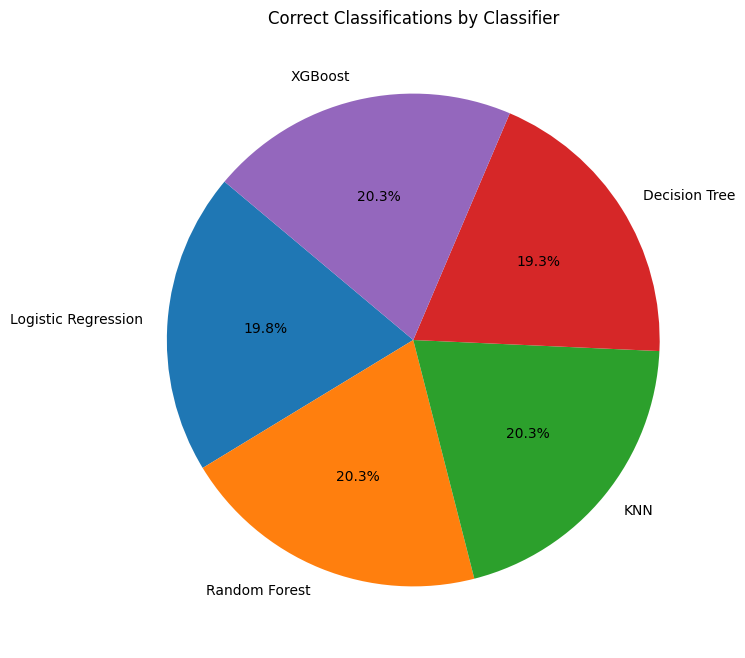

In [41]:
accuracies = [lr_ACC, rf_acc, knn_acc, dt_acc, xgb_acc]
classifiers = ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree', 'XGBoost']

plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=classifiers, autopct='%1.1f%%', startangle=140)
plt.title('Correct Classifications by Classifier')
plt.show()

In [49]:
def get_user_input():
    # Function to get user input
    Pclass = int(input("Enter value for Pclass :  "))
    Sex = float(input("Enter value for Sex: "))	
    Age = float(input("Enter value for Age: "))
    SibSp = int(input("Enter value for SibSp: "))
    Fare = float(input("Enter value for Age: "))
    Embarked = int(input("Enter value for Age: "))

    return np.array([[Pclass, Sex,Age ,SibSp ,Fare ,Embarked]])

def predict_user_input(model, user_input):
    prediction = model.predict(user_input)
    return prediction

user_input = get_user_input()

prediction = predict_user_input(knn, user_input)

print("Prediction:", prediction)


Enter value for Pclass :   1
Enter value for Sex:  0
Enter value for Age:  45.5
Enter value for SibSp:  0
Enter value for Age:  28.5000
Enter value for Age:  2


Prediction: [0]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
